# Logistic Regression - Credit Card Fraud Detection

---

## Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import joblib

---

## Datasets preparation

In [ ]:
path = '../DataSet/'

datasets = {
    "original": {
        "X_train": path + 'original-dataset/train/X.csv', "y_train": path + 'original-dataset/train/y.csv',
        "X_test": path + 'original-dataset/test/X.csv', "y_test": path + 'original-dataset/test/y.csv'
    },
    "undersampled": {
        "X_train": path + 'undersampled-dataset/train/X.csv', "y_train": path + 'undersampled-dataset/train/y.csv',
        "X_test": path + 'undersampled-dataset/test/X.csv', "y_test": path + 'undersampled-dataset/test/y.csv'
    },
    "oversampled": {
        "X_train": path + 'oversampled-dataset/train/X.csv', "y_train": path + 'oversampled-dataset/train/y.csv',
        "X_test": path + 'oversampled-dataset/test/X.csv', "y_test": path + 'oversampled-dataset/test/y.csv'
    }
}

---

## Original dataset

In [3]:
# Training set
X_train = pd.read_csv(datasets["original"]["X_train"])
y_train = pd.read_csv(datasets["original"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["original"]["X_test"])
y_test = pd.read_csv(datasets["original"]["y_test"])

### Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [5]:
X_train

array([[-0.33974783, -1.95144063, -1.16681856, ..., -1.6211327 ,
         0.96676   , -0.4486209 ],
       [ 4.27773998,  1.24181171, -0.15922175, ...,  1.34827683,
        -0.71311931,  0.33519183],
       [-0.0533992 ,  0.05339701, -0.92214029, ...,  1.73038298,
        -0.15212107,  0.26753092],
       ...,
       [-0.32837128, -0.31497174, -0.07400401, ..., -0.8272693 ,
        -0.29672056, -0.59571272],
       [-0.33974783, -0.14359433, -1.50291696, ...,  0.88219506,
         1.2243654 ,  1.01984233],
       [ 0.09364469, -0.38688453,  0.62962541, ..., -0.81609192,
         0.0044092 ,  0.11724428]], shape=(199364, 30))

### Hyperparam tuning with GridSearchCV

In [6]:
if os.path.exists('grid_search_lr_original.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_lr_original.pkl')

else:
    print("Performing grid search for Logistic Regression on original dataset...")
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    lr = LogisticRegression(max_iter=1000, random_state=42)
    grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_lr_original.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Performing grid search for Logistic Regression on original dataset...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9785758217531182
Best estimator: LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')


### Evaluation on test set

Test Classification Report:


c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.72      0.68      0.70       136

    accuracy                           1.00     85443
   macro avg       0.86      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Test ROC AUC Score: 0.9837447826845462
Test Confusion Matrix:
[[85271    36]
 [   44    92]]


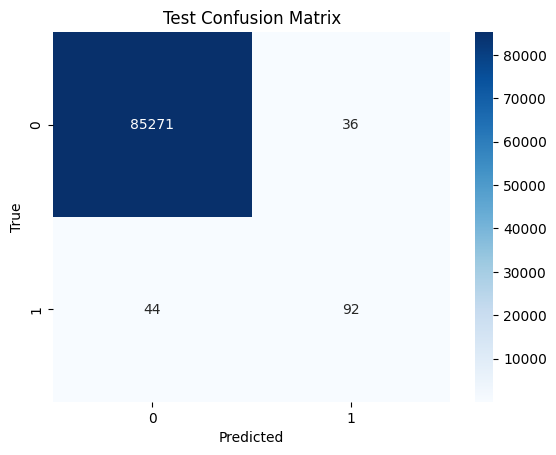

In [7]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Undersampled dataset

In [8]:
# Training set
X_train = pd.read_csv(datasets["undersampled"]["X_train"])
y_train = pd.read_csv(datasets["undersampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["undersampled"]["X_test"])
y_test = pd.read_csv(datasets["undersampled"]["y_test"])

# Original test set
X_test_ori = pd.read_csv(datasets["original"]["X_test"])
y_test_ori = pd.read_csv(datasets["original"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [9]:
if os.path.exists('grid_search_lr_undersampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_lr_undersampled.pkl')

else:
    print("Performing grid search for undersampled dataset...")
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    lr = LogisticRegression(max_iter=1000, random_state=42)
    grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_lr_undersampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Performing grid search for undersampled dataset...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.9828598786710652
Best estimator: LogisticRegression(C=0.1, max_iter=1000, random_state=42)


c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluation on undersampled test set

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       150
           1       0.99      0.90      0.94       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Test ROC AUC Score: 0.9799543378995432
Test Confusion Matrix:
[[148   2]
 [ 14 132]]


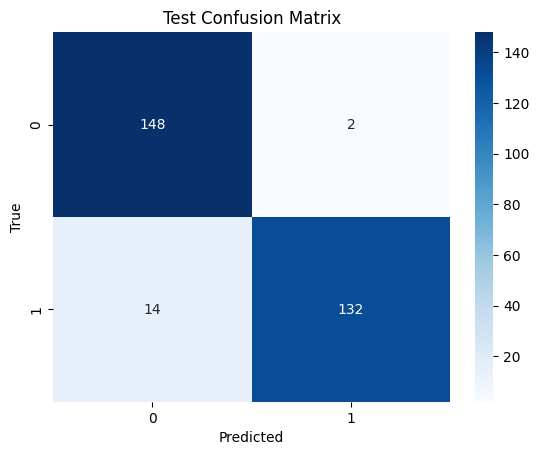

In [10]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Evaluation on original test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Test ROC AUC Score: 0.9908480201955705
Test Confusion Matrix:
[[82707  2600]
 [    9   127]]


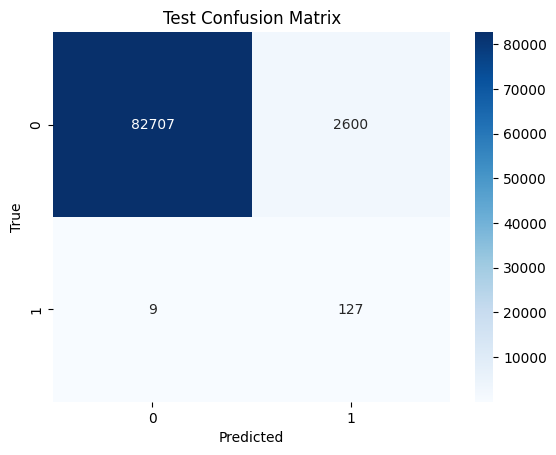

In [11]:
y_test_pred = best_estimator.predict(X_test_ori)
y_test_pred_proba = best_estimator.predict_proba(X_test_ori)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test_ori, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test_ori, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_ori, y_test_pred))
sns.heatmap(confusion_matrix(y_test_ori, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Oversampled dataset

In [12]:
# Training set
X_train = pd.read_csv(datasets["oversampled"]["X_train"])
y_train = pd.read_csv(datasets["oversampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["oversampled"]["X_test"])
y_test = pd.read_csv(datasets["oversampled"]["y_test"])

### Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.40252193, -1.78801326, -0.03953088, ..., -1.82911531,
         0.31612824, -0.46003976],
       [ 4.65847268,  1.43853484,  0.34440412, ...,  1.36234378,
        -0.40930151,  0.14909356],
       [-0.08866969,  0.23772864,  0.0537014 , ...,  1.77302346,
        -0.16704315,  0.09651146],
       ...,
       [-0.40044289, -1.06346102,  0.61912474, ..., -0.38503739,
        -0.0773115 , -0.0843506 ],
       [ 0.0650186 ,  1.04677553,  0.76605044, ..., -0.36974985,
        -0.12129076, -0.09511358],
       [-0.40252193, -1.4217068 , -2.36863582, ...,  1.41343418,
         2.39361909, -3.09314089]], shape=(398016, 30))

### Hyperparam tuning with GridSearchCV

In [15]:
if os.path.exists('grid_search_lr_oversampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_lr_oversampled.pkl')

else:
    print("Performing grid search for oversampled dataset...")
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    lr = LogisticRegression(max_iter=1000, random_state=42)
    grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_lr_oversampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Performing grid search for oversampled dataset...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.9897052998994779
Best estimator: LogisticRegression(C=10, max_iter=1000, random_state=42)


### Evaluation on test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.05     85443
   macro avg       0.50      0.52      0.05     85443
weighted avg       1.00      0.05      0.09     85443

Test ROC AUC Score: 0.9655689933727252
Test Confusion Matrix:
[[ 4090 81217]
 [    0   136]]


c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


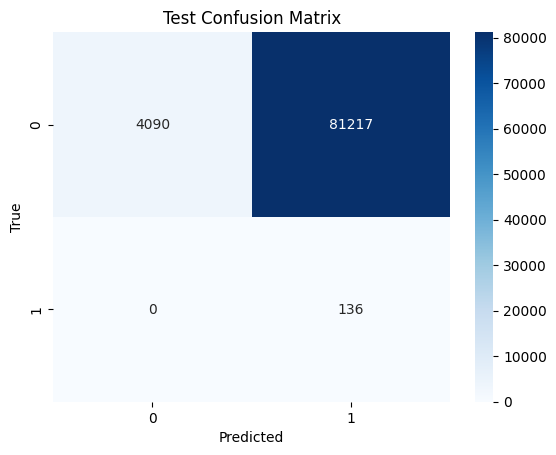

In [16]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Logistic Regression - Results comparison

| Dataset         | Best Parameters                                              | F1-Score (Class 1) | Recall (Class 1) | Precision (Class 1) | ROC AUC | Confusion Matrix                 | Observations                                                                                   |
|-----------------|--------------------------------------------------------------|---------------------|------------------|----------------------|---------|----------------------------------|------------------------------------------------------------------------------------------------|
| **Original**     | `c=0.1`, `penalty='l2'`, `solver='liblinear'` | 0.70                | 0.68             | 0.72                 | 0.984   | TN=85271, FP=36, FN=44, TP=92   | Offers a solid trade-off between precision and recall, with good overall balance.   |
| **Undersampled** | `c=0.1`, `penalty='l2'`, `solver='lbfgs'` | 0.09                | 0.93             | 0.05                 | 0.991   | TN=82707, FP=2600, FN=9, TP=127       | Very high recall but extremely low precision, highlighting a large number of false positives.                |
| **Oversampled**  | `c=10`, `penalty='l2'`, `solver='lbfgs'` | 0.00                | 1.00             | 0.00                 | 0.965   | TN=4090, FP=81217, FN=0, TP=136  | Despite perfect recall, the model fails completely on precision, leading to unusable results.         |


**Global observation:**

While logistic regression handles the original dataset reasonably well, its performance collapses on resampled datasets due to severe precision loss, showing that it struggles to maintain meaningful decision boundaries under class balancing techniques.